In [4]:
import requests, json
import base64
from IPython.display import Audio
import librosa
import io

In [2]:
# with open("example_audios/BP_2021-05-20_10-32-40_675435_0780000.tdms_1.wav", "rb") as f:
#     file_data = f.read()
with open("test_audio.wav", "rb") as f:
    file_data = f.read()

In [3]:
results = requests.post(
    "http://localhost:8050/upload",
    files = {"newAudioFile":file_data}
).json()
print(len(results))

1


In [4]:
result = results[0]

In [5]:
audio_id = result["audio_id"]

In [6]:
result["audio_duration"]

2.0

In [7]:
response = requests.post( 
    "http://localhost:8050/get-audio-clip-for-visualization",
    data = json.dumps( {
        "audio_id":audio_id,
        "start_time":0,
        "clip_duration":2,
    }),
    headers = {"content-type":"application/json"}
).json()


In [9]:
wav_arr = response["wav_array"]

In [10]:
import matplotlib.pyplot as plt

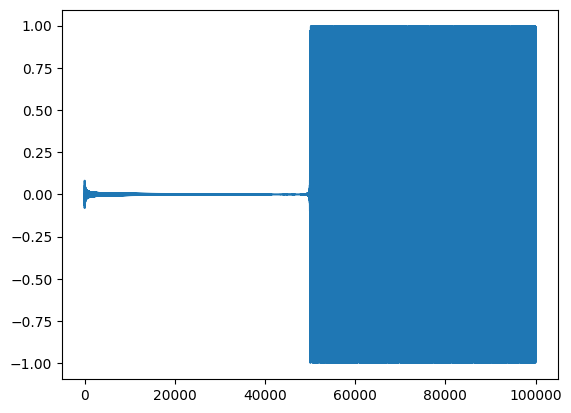

In [11]:
plt.plot( wav_arr )

In [7]:
response = requests.post( 
    "http://localhost:8050/get-audio-clip-wav",
    data = json.dumps( {
        "audio_id":audio_id,
        "start_time":30,
        "clip_duration":10,
    }),
    headers = {"content-type":"application/json"}
).json()

audio_clip, sr = librosa.load( io.BytesIO(base64.b64decode(response["wav"])), sr = None )
Audio(audio_clip, rate=sr)

In [8]:
audio, sr = librosa.load("example_audios/BP_2021-05-20_10-32-40_675435_0780000.tdms_1.wav", sr = None )
Audio(audio, rate=sr)

In [9]:
response = requests.post( 
    "http://localhost:8050/get-labels",
    data = json.dumps( {
        "audio_id":audio_id
    }),
    headers = {"content-type":"application/json"}
).json()

In [10]:
response

{'labels': [{'clustername': None, 'offset': 8.395, 'onset': 8.345},
  {'clustername': None, 'offset': 9.665, 'onset': 9.625},
  {'clustername': None, 'offset': 10.19, 'onset': 10.115},
  {'clustername': None, 'offset': 12.715, 'onset': 12.66},
  {'clustername': None, 'offset': 12.85, 'onset': 12.815},
  {'clustername': None, 'offset': 13.23, 'onset': 13.185},
  {'clustername': None, 'offset': 13.6, 'onset': 13.56},
  {'clustername': None, 'offset': 13.85, 'onset': 13.765},
  {'clustername': None, 'offset': 14.075, 'onset': 13.955},
  {'clustername': None, 'offset': 14.175, 'onset': 14.11},
  {'clustername': None, 'offset': 14.315, 'onset': 14.235},
  {'clustername': None, 'offset': 14.44, 'onset': 14.38},
  {'clustername': None, 'offset': 14.6, 'onset': 14.5},
  {'clustername': None, 'offset': 15.015, 'onset': 15.0},
  {'clustername': None, 'offset': 15.26, 'onset': 15.155},
  {'clustername': None, 'offset': 15.33, 'onset': 15.265},
  {'clustername': None, 'offset': 15.465, 'onset': 15

In [11]:
import requests, json
response = requests.post( 
    "http://localhost:8050/upload-by-url",
    data = json.dumps( {
        "audio_url":"https://file-examples.com/storage/fe7b7e0dc465e22bc9e6da8/2017/11/file_example_MP3_2MG.mp3"
    }),
    headers = {"content-type":"application/json"}
).json()
len(response)

2

In [12]:
response[0]["audio_duration"], response[1]["audio_duration"]

(53.916054421768706, 53.916054421768706)

In [13]:
response[0].keys()

dict_keys(['audio_duration', 'audio_id', 'freqs', 'spec'])

In [14]:
import requests, json
response = requests.post( 
    "http://localhost:8050/upload-by-url",
    data = json.dumps( {
        "audio_url":"https://www2.cs.uic.edu/~i101/SoundFiles/BabyElephantWalk60.wav" 
    }),
    headers = {"content-type":"application/json"}
).json()
len(response)

1

In [15]:
response[0]["audio_duration"]

60.0

In [16]:
response[0].keys()

dict_keys(['audio_duration', 'audio_id', 'freqs', 'spec'])

In [1]:
import librosa
import soundfile as sf
import numpy as np

In [5]:
sr = 16000
audio = np.concatenate([ np.zeros( sr ), np.random.rand(sr) * 2 - 1 ]).astype(np.float32)

In [7]:
sf.write("test_audio.wav", audio, samplerate=sr)

In [ ]:
501001 500000

In [ ]:
5000

In [2]:
500000 / 32000

15.625

In [18]:
import numpy as np

def min_max_downsample(array, rough_target_length):
    
    half_target_length = rough_target_length // 2
    downsample_factor = int(np.round( len(array) / half_target_length ))
    
    # Calculate the size of the downsampled array
    downsampled_length = len(array) // downsample_factor
    remainder = len(array) % downsample_factor

    # Handle case where array size is not a multiple of downsample_factor
    if remainder != 0:
        # Pad array to make it fit exactly into the downsample factor
        padded_size = downsampled_length * downsample_factor + downsample_factor
        padded_array = np.pad(array, (0, padded_size - array.size), 'constant', constant_values=np.nan)
    else:
        padded_array = array

    # Reshape the array to group by downsample factor
    reshaped_array = padded_array.reshape(-1, downsample_factor)

    # Calculate min and max for each group
    mins = np.nanmin(reshaped_array, axis=1)
    maxs = np.nanmax(reshaped_array, axis=1)

    # Combine mins and maxs into a single array
    downsampled_array = np.stack((mins, maxs), axis=-1)
    # If there was a remainder, trim the last element (as it was padded)
    if remainder != 0:
        downsampled_array = downsampled_array[:-1]
    
    downsampled_array = downsampled_array.flatten()
    return downsampled_array

In [5]:
audio, sr = librosa.load("example_audios/R3277_40905.13765404_12_28_3_49_25.wav", sr = None)

In [6]:
len(audio)

281088

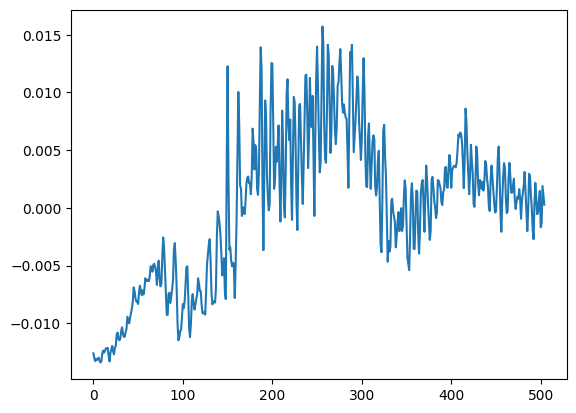

In [22]:
import matplotlib.pyplot as plt
plt.plot(audio[:505])

In [23]:
new_audio = min_max_downsample(audio[:505], 500)

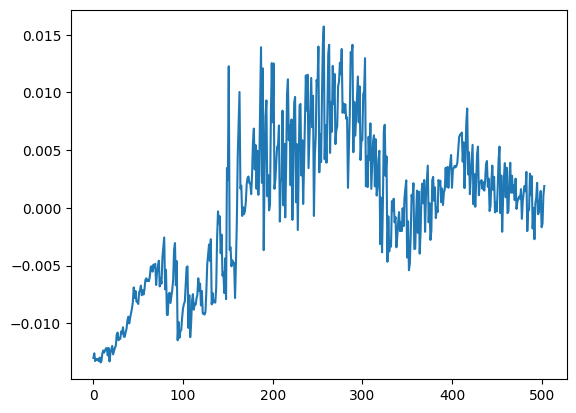

In [24]:
plt.plot(new_audio)

In [26]:
len(new_audio)

504